# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
  - Sumber: Kaggle https://www.kaggle.com/datasets/tawfikelmetwally/automobile-dataset
   - Deskripsi singkat: data teknis dan harga mobil (398 baris, 9 kolom)

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# **2. Import Library**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns        # opsional, untuk visualisasi cepat
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#Type your code here

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
from google.colab import files

uploaded = files.upload()


Saving Automobile.csv to Automobile.csv


In [3]:
# Load ke pandas DataFrame
file_path = 'Automobile.csv'

# Tampilkan 5 baris pertama & ringkasan struktur
df = pd.read_csv(file_path)
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


Dataset ini berisi 398 mobil dengan 9 kolom, yaitu:

- name (object): nama/tipe mobil.
- mpg (float): konsumsi bahan bakar dalam miles per gallon, rata‑rata ~23.5 (min 9, max 46.6).
- cylinders (int): jumlah silinder mesin, paling banyak 8, paling sedikit 3, rata‑rata ~5.5.
- displacement (float): kapasitas silinder (cc), rata‑rata ~193.4 (min 68, max 455).
- horsepower (float): tenaga kuda, rata‑rata ~104.5 (min 46, max 230); ada 6 nilai yang hilang.
- weight (int): bobot mobil (lbs), rata‑rata ~2970 (min 1613, max 5140).
- acceleration (float): waktu 0–60 mph (detik), rata‑rata ~15.6 (min 8, max 24.8).
- model_year (int): tahun pembuatan (70–82), rata‑rata ~76.0.
- origin (object): asal mobil (misal USA, Europe, Japan).

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
# 4.1 Cek missing values & duplikat
print("Missing per kolom:\n", df.isnull().sum())
print("\nJumlah duplikat: ", df.duplicated().sum())

Missing per kolom:
 name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

Jumlah duplikat:  0


Pada kolom horsepower ada 6 nilai yang hilang (1,5 % dari 398), sedangkan tidak ada baris duplikat sama sekali.

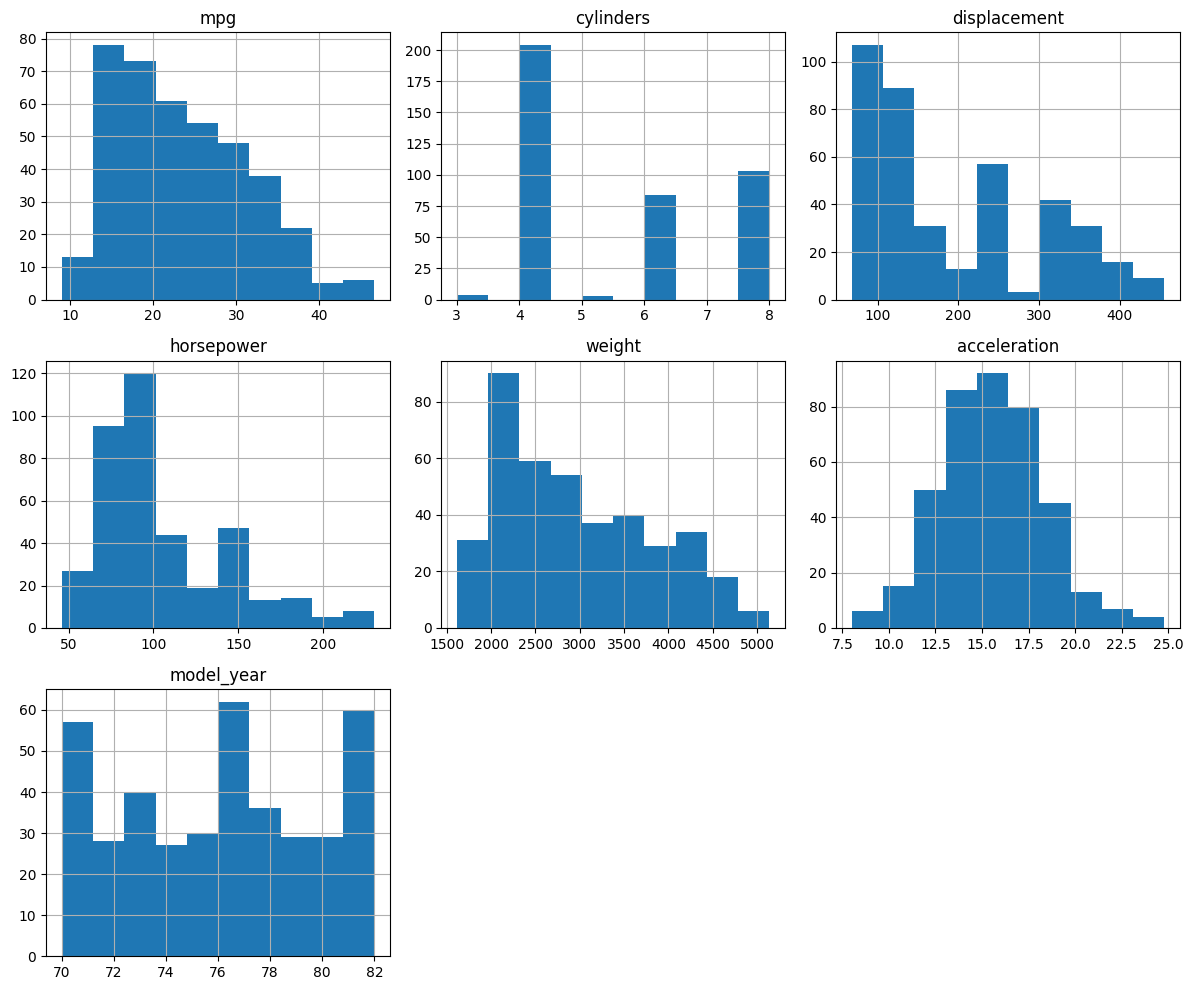

In [5]:
# 4.2 Distribusi variabel numerik
df.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

Dari histogram tiap fitur numeric terlihat pola distribusi sebagai berikut:

- mpg: nilai terbanyak di kisaran 15–30 mpg, dengan ekor kanan yang lebih panjang (beberapa mobil sangat irit >35 mpg).

- cylinders: diskrit, dominan 4‑silinder (~200 mobil), diikuti 8‑silinder (~100) dan 6‑silinder (~80), sangat sedikit 3‑silinder.

- displacement: multimodal, klaster utama di sekitar 70–120 cc, 200–260 cc, dan 300–360 cc; menunjukkan mesin kecil, menengah, dan besar.

- horsepower: juga multimodal—banyak di 75–100 hp dan 140–160 hp, dengan ekor ke atas hingga ~230 hp.

- weight: puncak di 2000–3000 lbs, menurun ke arah mobil yang lebih ringan dan ekor ke arah mobil berat (>4000 lbs).

- acceleration: mendekati distribusi normal, terpusat di 14–18 detik, sedikit outlier di bawah 10 s dan di atas 22 s.

- model_year: cukup merata dari 1970–1982, tapi ada lonjakan tahun 1975 dan 1981–82.

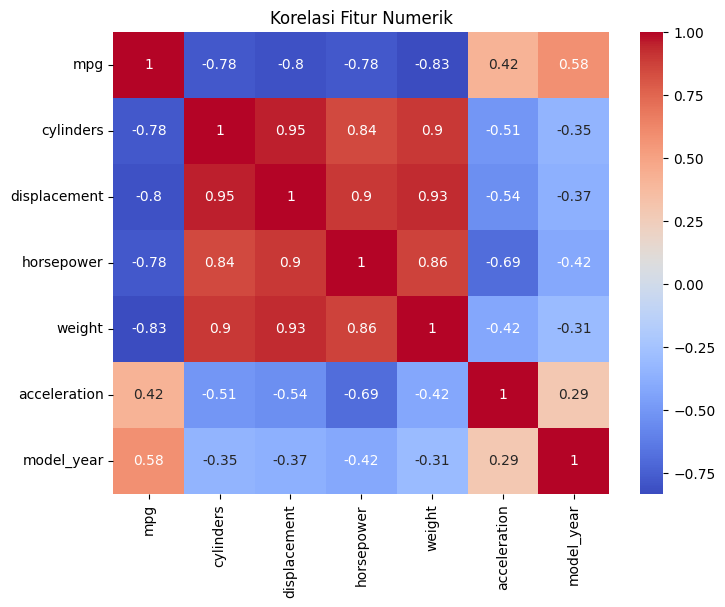

In [6]:
# 4.3 Heatmap korelasi (fokus numerik)
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes('number').corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur Numerik')
plt.show()

Dari matriks korelasi ini dapat disimpulkan beberapa poin kunci:

1. **Konsumsi bahan bakar (mpg)**

- Sangat negatif berkorelasi dengan weight (–0.83), displacement (–0.80), cylinders (–0.78) dan horsepower (–0.78): mobil yang lebih berat, berkapasitas silinder besar, banyak silinder, atau ber-tenaga tinggi cenderung lebih “haus” bensin.

- Cenderung positif dengan model_year (0.58) dan acceleration (0.42): mobil yang lebih baru dan yang akselerasinya lebih lambat (waktu 0–60 mph lebih panjang) sedikit lebih irit.

2. **Grup fitur mesin/bobot**

- cylinders, displacement, horsepower dan weight saling berkorelasi sangat tinggi (0.84–0.95): ini mengindikasikan bahwa mesin dengan silinder lebih banyak biasanya berkapasitas besar, ber-tenaga tinggi, dan bobotnya pun lebih berat.

3. **Akselerasi**

- acceleration (waktu 0–60 mph) negatif dengan horsepower (–0.69), displacement (–0.54) dan weight (–0.42): mobil yang lebih bertenaga atau berat bisa mencapai 60 mph lebih cepat (angka akselerasi kecil).

- positif dengan mpg (0.42) dan model_year (0.29): akselerasi lambat cenderung di mobil lebih irit dan yang lebih baru.

4. **Tahun model**

- model_year punya korelasi positif sedang ke mpg (0.58) dan acceleration (0.29), yang masuk akal—seiring waktu teknologi meningkatkan efisiensi bahan bakar, tapi tidak selalu meningkatkan tenaga/kecepatan (atau malah difokuskan pada efisiensi).

**Secara keseluruhan, ada dua klaster utama:**

- Mesin besar & berat ↔ konsumsi tinggi & akselerasi cepat.

- Mobil baru & ringan ↔ konsumsi rendah & akselerasi lebih lambat.

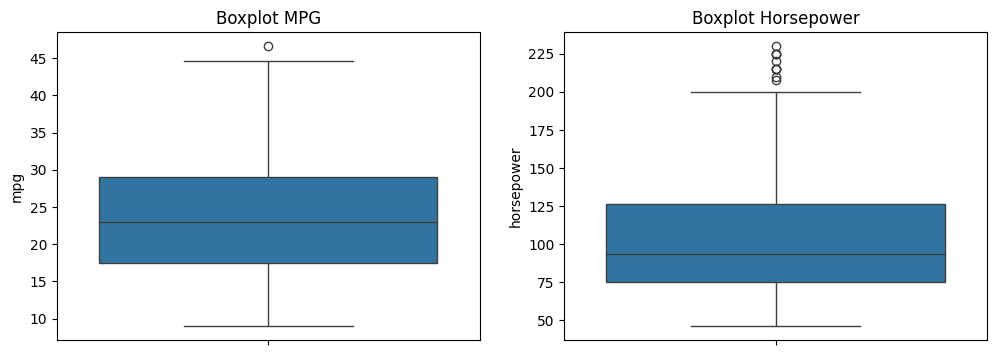

In [7]:
# 4.4 Boxplot untuk deteksi outlier (contoh: mpg, horsepower)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(y=df['mpg'])
plt.title('Boxplot MPG')
plt.subplot(1,2,2)
sns.boxplot(y=df['horsepower'])
plt.title('Boxplot Horsepower')
plt.show()

Pada boxplot **mpg** terlihat:

- Median di sekitar 23 mpg.

- IQR (Q1–Q3) kira‑kira 17.5–29 mpg, menunjukkan setengah besar mobil punya efisiensi di rentang ini.

- Whisker bawah turun hingga ~9 mpg, whisker atas hingga ~45 mpg.

- Ada beberapa outlier di atas ~46 mpg (mobil yang sangat irit).

Pada boxplot **horsepower** terlihat:

- Median sekitar 93–95 hp.

- IQR di kisaran 75–126 hp, jadi setengah besar mobil bertenaga di rentang ini.

- Whisker bawah sampai ~46 hp, whisker atas sampai ~200 hp.

- Terdapat sejumlah outlier di atas 200 hp (mobil performa tinggi yang jauh lebih bertenaga daripada mayoritas).

In [8]:
# 4.5 Cek nilai unik origin (kategorikal)
print("Origin unique:", df['origin'].unique())

Origin unique: ['usa' 'japan' 'europe']


Kolom origin adalah fitur kategorikal dengan tiga nilai unik:

- usa
-japan
- europe

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [9]:
# 5.1 Tangani missing values (imputasi median untuk horsepower)
median_hp = df['horsepower'].median()
df['horsepower'] = df['horsepower'].fillna(median_hp)

- Hitung median horsepower lalu isi (fillna) ke baris yang kosong.

- Membuat distribusi fitur tetap utuh tanpa menghapus data.

In [10]:
# 5.2 One‑hot encode kolom origin
df = pd.get_dummies(df, columns=['origin'], drop_first=True)

- Ubah kolom kategori (usa, japan, europe) jadi dummy variables.

- drop_first=True mencegah multikolinearitas dengan menjatuhkan satu kolom.

In [11]:
# 5.3 Drop kolom non‑numerik yang tidak penting
df = df.drop(columns=['name'])   # kecuali ingin ekstrak merek/model

- Buang kolom name (string) agar hanya tersisa fitur numerik dan dummy.

- Nama mobil tidak dipakai langsung oleh model.

In [12]:
# 5.4 Deteksi & penanganan outlier (contoh IQR untuk mpg)
Q1 = df['mpg'].quantile(0.25)
Q3 = df['mpg'].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
df = df[(df['mpg'] >= lower) & (df['mpg'] <= upper)]

- Hitung Q1 dan Q3 untuk mpg lalu tentukan batas bawah/atas
- Filter data agar hanya yang mpg-nya dalam rentang wajar (buang outlier).

In [13]:
# 5.5 Normalisasi / Standarisasi fitur numerik
num_cols = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

- Pilih fitur numerik (mpg, cylinders, …, model_year).
- Terapkan StandardScaler untuk menskalakan tiap kolom jadi mean=0, std=1.

In [14]:
# 5.6 Simpan hasil preprocessing
output_path = '/content/Automobile_clean.csv'
df.to_csv(output_path, index=False)
print("Preprocessed data saved to:", output_path)

Preprocessed data saved to: /content/Automobile_clean.csv


- Export DataFrame bersih ke CSV (Automobile_clean.csv)

- Siap dipakai untuk eksplorasi lanjutan atau training model.